In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train ), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


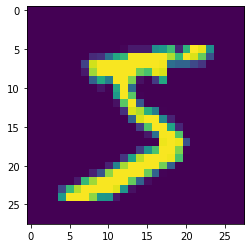

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_test = X_test/255


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [9]:
#28 * 28 = 784 

#784 / 2 = 400

In [10]:
X_train[0].shape

(28, 28)

In [11]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [14]:
decoder = Sequential()
encoder.add(Dense(50, input_shape=[25], activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [15]:
autoencoder = Sequential([encoder,decoder])

In [16]:
autoencoder.compile(loss='binary_crossentropy', optimizer=SGD(lr=1.5), metrics=['accuracy'])

In [17]:
autoencoder.fit(X_train,X_train, epochs=5, validation_data=(X_test, X_test))

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2587 - accuracy: 0.1057 - val_loss: 0.1507 - val_accuracy: 0.1950
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1445 - accuracy: 0.2095 - val_loss: 0.1268 - val_accuracy: 0.2374
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1245 - accuracy: 0.2374 - val_loss: 0.1160 - val_accuracy: 0.2406
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1148 - accuracy: 0.2509 - val_loss: 0.1064 - val_accuracy: 0.2565
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1084 - accuracy: 0.2619 - val_loss: 0.1025 - val_accuracy: 0.2703


In [18]:
passed_images = autoencoder.predict(X_test[:10])

 image d'origine numéro :  3


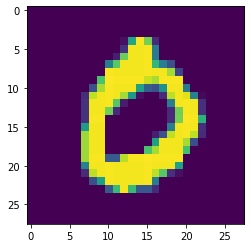

In [22]:
n = 3
print(" image d'origine numéro : ",n)
plt.imshow(X_test[n])
plt.show()

 reconstruction apres autoencoder :  3


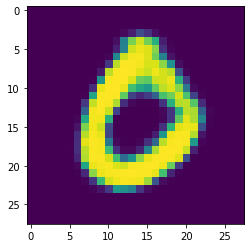

In [23]:
print(" reconstruction apres autoencoder : ",n)
plt.imshow(passed_images[n])


# Ajouter du bruit a nos images

In [24]:
from tensorflow.keras.layers import GaussianNoise

In [28]:
sample = GaussianNoise(0.2)
noisey = sample(X_test[:10], training=True)

d'origine


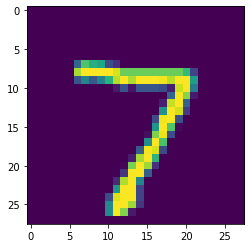

Avec du bruit


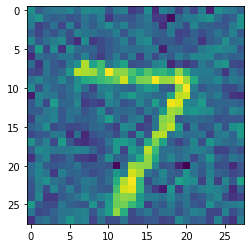

In [30]:
n = 0
print("d'origine")
plt.imshow(X_test[n])
plt.show()
print("Avec du bruit")
plt.imshow(noisey[n])

In [31]:
import tensorflow as tf

In [33]:
tf.random.set_seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [34]:
decoder = Sequential()
encoder.add(Dense(50, input_shape=[25], activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [35]:
noise_remover = Sequential([encoder,decoder])
noise_remover.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

In [36]:
noise_remover.fit(X_train, X_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2181 - accuracy: 0.1326
Epoch 2/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1344 - accuracy: 0.2255
Epoch 3/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1233 - accuracy: 0.2419
Epoch 4/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1163 - accuracy: 0.2518
Epoch 5/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1120 - accuracy: 0.2603
Epoch 6/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1094 - accuracy: 0.2670
Epoch 7/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1070 - accuracy: 0.2699
Epoch 8/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1054 - accuracy: 0.2730


In [37]:
ten_noisey_images = sample(X_test[:10], training=True)
denoiser = noise_remover(ten_noisey_images)

original


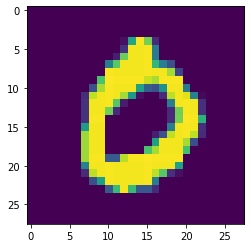

image avec du bruit


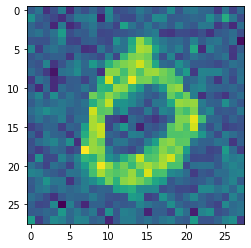

apres le debruitage


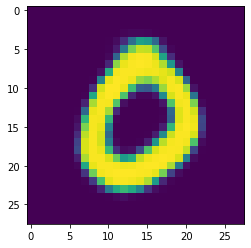

In [40]:
n=3

print("original")

plt.imshow(X_test[n])
plt.show()
print("image avec du bruit")
plt.imshow(ten_noisey_images[n])
plt.show()

print("apres le debruitage")
plt.imshow(denoiser[n])
plt.show()
